![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [90]:
# Start your code here!
import pandas as pd
import pingouin as pingouin
import matplotlib.pyplot as plt
#Importing Data
df_women=pd.read_csv('women_results.csv',parse_dates=['date'])
df_men=pd.read_csv('men_results.csv',parse_dates=['date'])
print(df_men.info())
print(df_women.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  44353 non-null  int64         
 1   date        44353 non-null  datetime64[ns]
 2   home_team   44353 non-null  object        
 3   away_team   44353 non-null  object        
 4   home_score  44353 non-null  int64         
 5   away_score  44353 non-null  int64         
 6   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4884 non-null   int64         
 1   date        4884 non-null   datetime64[ns]
 2   home_team   4884 non-null   object        
 3   away_team   4884 non-null   object 

In [91]:
#Creating total goal columns for each dataset
df_men['total_goals']=df_men['home_score']+df_men['away_score']
df_women['total_goals']=df_women['home_score']+df_women['away_score']
print(df_men.head())
print(df_women.head())

   Unnamed: 0       date home_team  ... away_score  tournament  total_goals
0           0 1872-11-30  Scotland  ...          0    Friendly            0
1           1 1873-03-08   England  ...          2    Friendly            6
2           2 1874-03-07  Scotland  ...          1    Friendly            3
3           3 1875-03-06   England  ...          2    Friendly            4
4           4 1876-03-04  Scotland  ...          0    Friendly            3

[5 rows x 8 columns]
   Unnamed: 0       date home_team  ... away_score        tournament  total_goals
0           0 1969-11-01     Italy  ...          0              Euro            1
1           1 1969-11-01   Denmark  ...          3              Euro            7
2           2 1969-11-02   England  ...          0              Euro            2
3           3 1969-11-02     Italy  ...          1              Euro            4
4           4 1975-08-25  Thailand  ...          2  AFC Championship            5

[5 rows x 8 columns]


In [92]:
#Restricting data since 2002-01-01
df_men=df_men[df_men['date']>='2002-01-01']
df_women=df_women[df_women['date']>='2002-01-01']
print(df_men.head())
print(df_women.head())

       Unnamed: 0       date  ...            tournament total_goals
24863       24863 2002-01-04  ...  Prime Minister's Cup           2
24864       24864 2002-01-04  ...              Friendly           2
24865       24865 2002-01-04  ...              Friendly           4
24866       24866 2002-01-05  ...  Prime Minister's Cup           0
24867       24867 2002-01-05  ...              Friendly           3

[5 rows x 8 columns]
      Unnamed: 0       date  ...               tournament total_goals
1365        1365 2002-01-23  ...  Four Nations Tournament           1
1366        1366 2002-01-23  ...  Four Nations Tournament           3
1367        1367 2002-01-25  ...  Four Nations Tournament           0
1368        1368 2002-01-25  ...  Four Nations Tournament           3
1369        1369 2002-01-27  ...  Four Nations Tournament           4

[5 rows x 8 columns]


In [93]:
#Restricting data to FIFA World Cup
df_men=df_men[df_men['tournament']=="FIFA World Cup"]
df_women=df_women[df_women['tournament']=="FIFA World Cup"]
print(df_men.head())
print(df_women.head())

       Unnamed: 0       date  ...      tournament total_goals
25164       25164 2002-05-31  ...  FIFA World Cup           1
25165       25165 2002-06-01  ...  FIFA World Cup           8
25166       25166 2002-06-01  ...  FIFA World Cup           2
25167       25167 2002-06-01  ...  FIFA World Cup           3
25168       25168 2002-06-02  ...  FIFA World Cup           1

[5 rows x 8 columns]
      Unnamed: 0       date  ...      tournament total_goals
1600        1600 2003-09-20  ...  FIFA World Cup           3
1601        1601 2003-09-20  ...  FIFA World Cup           2
1602        1602 2003-09-20  ...  FIFA World Cup           5
1603        1603 2003-09-20  ...  FIFA World Cup           6
1604        1604 2003-09-21  ...  FIFA World Cup           4

[5 rows x 8 columns]


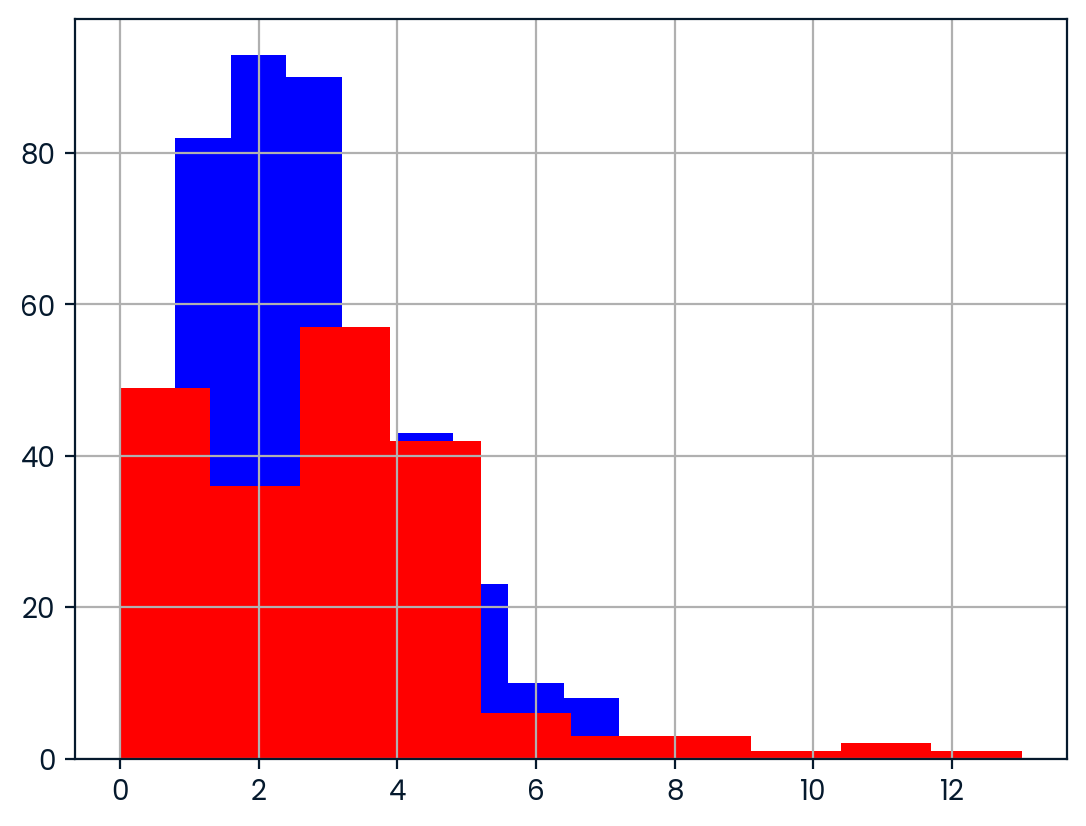

In [94]:
# Determinating normality with histograms
df_men['total_goals'].hist(color='blue')
df_women['total_goals'].hist(color='red')
plt.show()

The data is not normally distributed. I proceed to use MWU

In [95]:
#Creating a MWU test
#Creating a new DF with both women and men goals
df_men['group']="men"
df_women['group']="woman"
df_both = pd.concat([df_women, df_men], axis=0, ignore_index=True)
df_both_subset = df_both[["total_goals", "group"]]
#Creating a wide dataset
df_both_subset_wide = df_both_subset.pivot(columns="group", values="total_goals")
#Perform a MWU test
MWU_test=pingouin.mwu(x=df_both_subset_wide['woman'],y=df_both_subset_wide['men'],alternative='greater')
p_val = MWU_test['p-val'].values[0]
print(MWU_test)
print(p_val)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451
0.005106609825443641


In [96]:
#Stablish a condition of hypothesis
alpha=0.01
if p_val<alpha:
    result='reject'
else:
    result='fail to reject'
result_dict = {"p_val": p_val, "result": result} 
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
